### CAMELYON17 Dataset Evaluation
This notebook covers the results using the CAMELYON17 dataset. This dataset includes tissue patches obtained from patients in multiple hospitals. The patches from different hospitals are used to evaluate the domain generalization of the baseline CNN model compared to the CNN models trained with augmented data. First, the required libraries are loaded. 

In [1]:
# Standard libraries
import numpy as np
import matplotlib.pyplot as plt

# Load the functions and classes from main_util.py
from main_util import Model_architecture
from main_util import evaluation_pcam17

# Loading models
from tensorflow.keras.models import load_model

# ROC curve analysis
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

The following codeblock is used to initialize the filepaths to the folder containing the patches and the `metadata.csv` file, which comes with the patches. The full patch-based CAMELYON17 dataset can be downloaded from WILDS. Please click <a href="https://worksheets.codalab.org/bundles/0xe45e15f39fb54e9d9e919556af67aabe">here</a> if you want to download the dataset and the metadata. Otherwise, the following code can not be executed.

In [2]:
# Defining filepaths
patch_folder_path = "../CAMELYON17 dataset/patches"
metadata_path = "../CAMELYON17 dataset/metadata.csv"

The `metadata.csv` file contains all the necessary information about the patches. The columns of this file contain: `index`, `patient number`, `node number`, `x-coordinate` w.r.t. the full WSI, `y-coordinate` w.r.t. the full WSI, `label`, `slide number`, `hospital` and `split number`. The metadata is split into the training and testing set based on the `split number`, where 0 is the training set and 1 the testing set. The columns of this csv file can be used later to easily get access to the correct folders, where the patches are saved.

In [3]:
# Loading the metadata into a numpy array
metadata = np.genfromtxt(metadata_path, dtype=int, delimiter=",", skip_header=1)

# The following code splits the metadata into a training and testing set based on the split number
splitted_metadata = np.split(metadata, np.where(np.diff(metadata[:,8]))[0]+1)

training_metadata = splitted_metadata[0]
testing_metadata = splitted_metadata[1]
for index in range(2, len(splitted_metadata)):
    if index%2 == 0:
        training_metadata = np.vstack((training_metadata, splitted_metadata[index]))
    else:
        testing_metadata = np.vstack((testing_metadata, splitted_metadata[index]))

The function `start_evaluation` is created in this notebook to easily initialize the evaluation process for different models. It uses a call to a different function `evaluation_pcam17`, which is located in `main_util.py` and performs the main work for the evaluation. This can easily be done for different CNN models by changing the input arguments. The function returns the true labels and the predicted labels, which can be used to perform ROC-curve analysis.

In [4]:
def start_evaluation(model_name, patch_folder_path, testing_metadata):
    """
    Args
    model_name:         a string containing the name of the model.
    patch_folder_path   a string containing the filepath to the folder where the patches are located.
    testing_metadata:   a numpy array containing the metadata of the testing set with the following columns:
                        index, patient nr, node nr, x-coordinate, y-coordinate, label, slide nr, split nr
    """
    # Defining model weights filepath
    save_filepath = f"trained_models/{model_name}.tf"

    # Create model architecture and load weights into it
    model = load_model(save_filepath)

    # Calling evaluation function
    true_labels, pred_labels = evaluation_pcam17(model, patch_folder_path, testing_metadata)

    return true_labels, pred_labels

In [5]:
# Defining model name
model_name = "cnn_baseline"

# Calling evaluation function
true_labels_baseline, pred_labels_baseline = start_evaluation(model_name, patch_folder_path, testing_metadata)

Progress: 0% done
Progress: 10% done
Progress: 20% done
Progress: 30% done
Progress: 40% done
Progress: 50% done
Progress: 60% done
Progress: 70% done
Progress: 80% done
Progress: 90% done
Progress: 100% done


In [6]:
# Defining model name
model_name = "cnn_augmented_0.25"

# Calling evaluation function
true_labels_aug_25, pred_labels_aug_25 = start_evaluation(model_name, patch_folder_path, testing_metadata)

Progress: 0% done
Progress: 10% done
Progress: 20% done
Progress: 30% done
Progress: 40% done
Progress: 50% done
Progress: 60% done
Progress: 70% done
Progress: 80% done
Progress: 90% done
Progress: 100% done


In [7]:
# Defining model name
model_name = "cnn_augmented_0.50"

# Calling evaluation function
true_labels_aug_50, pred_labels_aug_50 = start_evaluation(model_name, patch_folder_path, testing_metadata)

Progress: 0% done
Progress: 10% done
Progress: 20% done
Progress: 30% done
Progress: 40% done
Progress: 50% done


In [ ]:
# Defining model name
model_name = "cnn_augmented_0.75"

# Calling evaluation function
true_labels_aug_75, pred_labels_aug_75 = start_evaluation(model_name, patch_folder_path, testing_metadata)

Progress: 0% done
Progress: 10% done
Progress: 20% done
Progress: 30% done
Progress: 40% done
Progress: 50% done
Progress: 60% done
Progress: 70% done
Progress: 80% done
Progress: 90% done
Progress: 100% done


In [ ]:
# Defining model name
model_name = "cnn_augmented_1"

# Calling evaluation function
true_labels_aug_1, pred_labels_aug_1 = start_evaluation(model_name, patch_folder_path, testing_metadata)

Progress: 0% done
Progress: 10% done
Progress: 20% done
Progress: 30% done
Progress: 40% done
Progress: 50% done
Progress: 60% done
Progress: 70% done
Progress: 80% done
Progress: 90% done
Progress: 100% done


The next code makes a ROC-curve for all the models inside one figure.

The AUC for the CNN-baseline model is 0.83
The AUC for the CNN-augmented-25 model is 0.85
The AUC for the CNN-augmented-50 model is 0.85
The AUC for the CNN-augmented-75 model is 0.87
The AUC for the CNN-augmented-100 model is 0.85


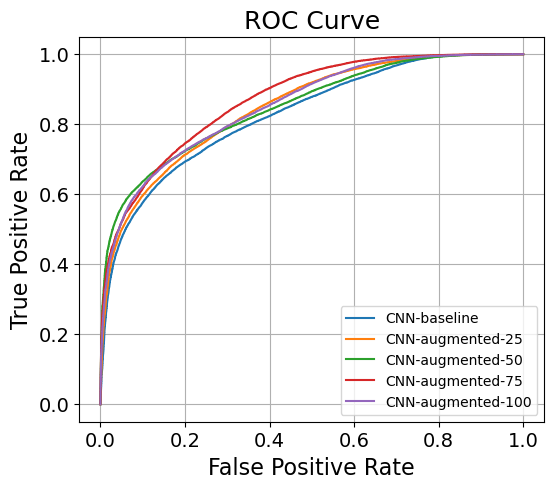

In [ ]:
# Add the data to a list
all_true_labels = [true_labels_baseline, true_labels_aug_25, true_labels_aug_50, true_labels_aug_75, true_labels_aug_1]
all_pred_labels = [pred_labels_baseline, pred_labels_aug_25, pred_labels_aug_50, pred_labels_aug_75, pred_labels_aug_1]
model_names = ['CNN-baseline', 'CNN-augmented-25', 'CNN-augmented-50', 'CNN-augmented-75', 'CNN-augmented-100']

# Create figure
fig,ax = plt.subplots(1,1,figsize=(6,5))

all_auc = []
for i in range(len(all_true_labels)):
    # Calculating false positive rates (fpr), true positive rates (tpr) and AUCs
    fpr, tpr, thresholds = roc_curve(all_true_labels[i], all_pred_labels[i])
    roc_auc = auc(fpr, tpr)
    all_auc.append(roc_auc)

    # Plot the ROC-curves
    roc = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    roc.plot(ax=ax)

ax.set_title('ROC Curve', size=18)
ax.set_xlabel('False Positive Rate', size=16)
ax.set_ylabel('True Positive Rate', size=16)
ax.legend(model_names, loc='lower right')
ax.tick_params(axis="both", labelsize=14)
ax.grid()

filename = 'roc_pcam17.png'
plt.savefig(filename)

for i in range(len(all_auc)):
    print(f"The AUC for the {model_names[i]} model is {all_auc[i]:.2f}")